ideas pendings to implement
sns.catplot(y='Gender',x='Age',data=df.sort_values("Gender",ascending= False),kind="violin",height=7,aspect=4)

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [60]:
data = pd.read_csv("train.csv")
df = data.copy()
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [62]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [63]:
df = df.drop(["User_ID","Product_ID"],axis=1)

In [64]:
df.isnull().sum()/df.shape[0]*100

Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [66]:
for i in df.columns:
    if len(df[i].unique()) < 20 :
        print(i,"column we have ",len(df[i].unique()),"Unique values :","\n ",df[i].unique())

Gender column we have  2 Unique values : 
  ['F' 'M']
Age column we have  7 Unique values : 
  ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
City_Category column we have  3 Unique values : 
  ['A' 'C' 'B']
Stay_In_Current_City_Years column we have  5 Unique values : 
  ['2' '4+' '3' '1' '0']
Marital_Status column we have  2 Unique values : 
  [0 1]
Product_Category_2 column we have  18 Unique values : 
  [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Product_Category_3 column we have  16 Unique values : 
  [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [87]:
def analysisplot(col):
    '''
    col provide the column
    '''
    print(data[col].value_counts(normalize=True)*100)
    sns.countplot(df[col])
    plt.title(f'{col}' )
    plt.show()
'''
We can use this loop to get all the deatils(plots at a place but it wont help in drawing out conclusions)
for i in df.columns:
    analysisplots(i)
'''

'\nWe can use this loop to get all the deatils(plots at a place but it wont help in drawing out conclusions)\nfor i in df.columns:\n    analysisplots(i)\n'

1     35.235825
2     18.513711
3     17.322404
4+    15.402823
0     13.525237
Name: Stay_In_Current_City_Years, dtype: float64


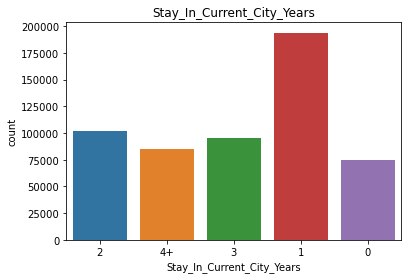

In [92]:
analysisplot('Stay_In_Current_City_Years')

In [90]:
3.909+2.745

6.654

Notes
1. We can see that ***USER_ID*** and ***Product_ID*** are are having high number of unique values which may not help in reaching our goal so droping them.
2. We have 69% and 31% of null values in ***Product_Category_2*** and ***Product_Category_3*** respectivly which may lead to poor performance so we should handle the null values.
3. We can encode the columns ***Gender, City_Category and Stay_In_Current_City_Years (only 4+ to 4)***.

Analysisplots Outcomes column wise:
1. The male(75%) contibution is more when compared to Female(25%)
2. The Contribution from age group 26-35(39%) followed by 36-45(~20%) and 18-25(18%). The age groups 55+ and 0-17 combined is ~6.6%
3. The most purchases are made from B city_catrgory followed by C and A.
4. 

